In [2]:
%cd ~/lab/NB10422645/
from src.surrogate.algorithms import SSIFL
from src.optimisation.routines import SciKitOptOptimiserRoutine
from sklearn.svm import SVR as svr_model
from src.surrogate.sampling import halton
from src.surrogate.sampling import random_uniform
from src.surrogate.test import TestFunctionSet2DInputSpace as F2D
from src.surrogate.test import TestFunctionSetNDInputSpace as FND
from sklearn.preprocessing import MinMaxScaler

import skopt
import skopt.plots
import matplotlib.pyplot as plt

import numpy as np
from src.surrogate.sampling import uniform_grid
from src.surrogate.sampling.util import plotly3Dsurf, plotly3Dtrisurf, plotly3DsurfModelPerformance


/home/ggarrett/lab/NB10422645


/home/ggarrett/anaconda3/envs/sigh/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
meta_model = svr_model

routine = dict(
    intermediate=[
        {
            "real__gamma":(1e-3, 2e3),
            "real__epsilon":(5e-4, 2e-1),
            "_optimiser__name":"gp_minimize",
            "_optimiser__kwargs":{"n_calls":200}
        }
    ]
)

routine_manager = SciKitOptOptimiserRoutine(routine)


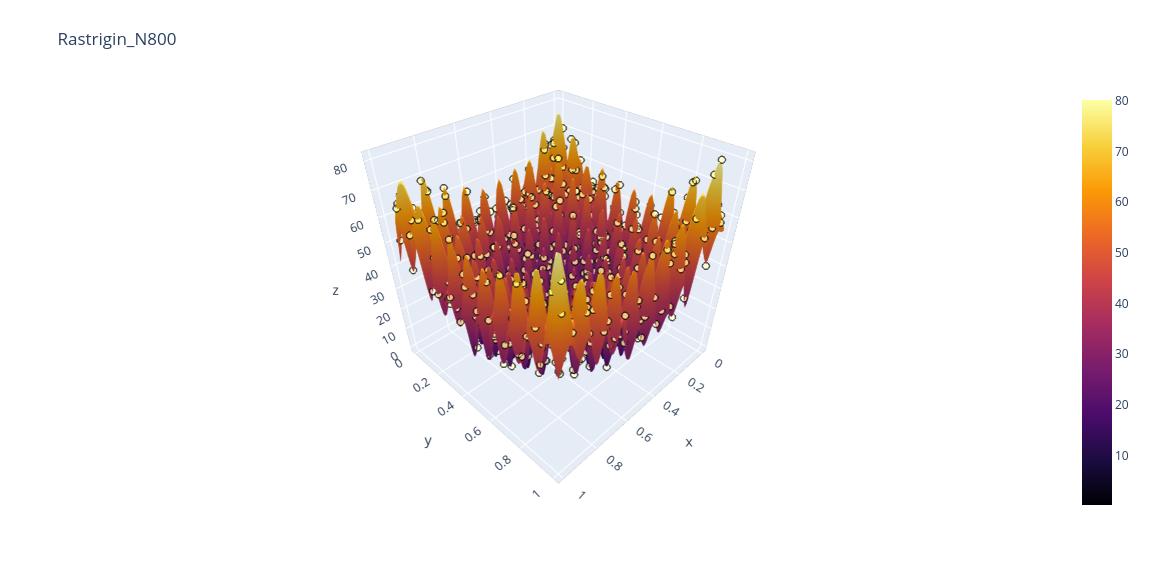

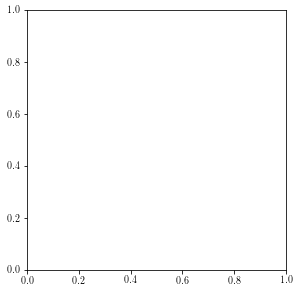

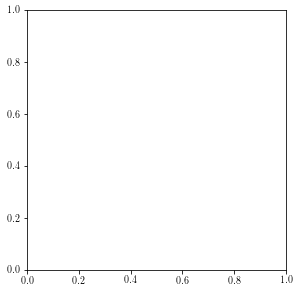

In [ ]:
n = 2
F_ = FND(n)[0]
import os
def optimise_fit_function(F_, n_samples, path):
    name = f"{F_.__str__().split(' ')[0]}_N{n_samples}"
    PATH = os.path.join(path,name)
    if os.path.exists(PATH):
        pass
    else:
        os.mkdir(PATH)
        
    scaler = MinMaxScaler()
    bounds = [[0]*n,[1]*n]
    x_train = halton(bounds, n_samples)
    x_test_ = random_uniform(bounds, 1000)
    f_train = F_(*x_train.T)
    f_test_ = F_(*x_test_.T)
    ds_train = (x_train, scaler.fit_transform(f_train.reshape(-1, 1)).flatten())
    ds_test_ = (x_test_, scaler.transform(f_test_.reshape(-1, 1)).flatten())
    
    def function_to_minimize(**params):
        svr = svr_model(**params)
        svr.fit(*ds_train)
        return - svr.score(*ds_test_)
    
    result = routine_manager.optimise_routine(function_to_minimize, tdmq=True)
    
    skopt.plots.plot_objective(result)
    plt.savefig(PATH+"/"+name+"_objective.pdf", bbox_inches="tight")
    plt.clf()
    plt.cla()
    
    skopt.plots.plot_convergence(result)
    plt.savefig(PATH+"/"+name+"_convergence.pdf", bbox_inches="tight")
    plt.clf()
    plt.cla()
    
    skopt.plots.plot_evaluations(result)
    plt.savefig(PATH+"/"+name+"_evaluations.pdf", bbox_inches="tight")
    plt.clf()
    plt.cla()
    
    optimised_model = svr_model(**routine_manager._get_global_static_params()["function"])
    optimised_model.fit(*ds_train)
    plotly3DsurfModelPerformance(optimised_model, 2, scaler, show_train_scatter=ds_train, save=True, name=name, path=PATH)
    

# optimise_fit_function(F2D()[0], 100, "./notebooks/Experiments/")
# optimise_fit_function(F2D()[0], 200, "./notebooks/Experiments/")

optimise_fit_function(F2D()[0], 300, "./notebooks/Experiments/")
optimise_fit_function(F2D()[0], 400, "./notebooks/Experiments/")
optimise_fit_function(F2D()[0], 500, "./notebooks/Experiments/")
optimise_fit_function(F2D()[0], 600, "./notebooks/Experiments/")
optimise_fit_function(F2D()[0], 700, "./notebooks/Experiments/")
optimise_fit_function(F2D()[0], 800, "./notebooks/Experiments/")

In [ ]:
def function_to_minimize(**params):
    svr = svr_model(**params)
    svr.fit(*ds_train)
    return - svr.score(*ds_test_)

In [5]:
import skopt.plots
result = routine_manager.optimize_routine(function_to_minimize, tdmq=True)

AttributeError: 'SciKitOptOptimiserRoutine' object has no attribute 'optimize_routine'

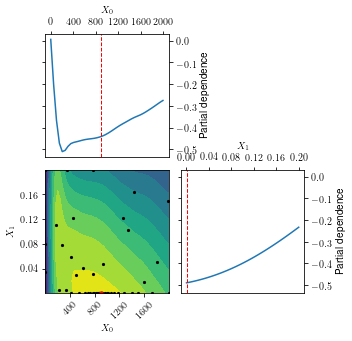

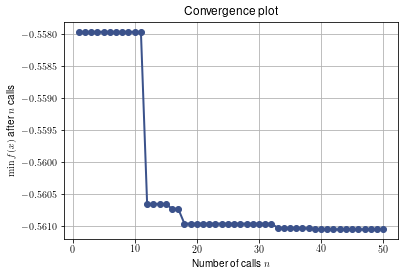

In [12]:
import matplotlib.pyplot as plt
skopt.plots.plot_objective(result)
plt.show()
# skopt.plots.plot_evaluation(result)
skopt.plots.plot_convergence(result)
plt.show()

In [8]:

optimised_model = svr_model(**routine_manager._get_global_static_params()["function"])
optimised_model.fit(*ds_train)
plotly3DsurfModelPerformance(optimised_model, 2, scaler, show_train_scatter=False)
print(routine_manager._get_global_static_params()["function"])
plotly3DsurfModelPerformance(optimised_model, 2, scaler, show_train_scatter=False)

{'gamma': 725.5040370754085, 'epsilon': 0.0005}


In [6]:
from sklearn.model_selection import KFold

In [7]:
x = np.array([[7,6,5,4,3,2,1],[1,2,3,4,5,6,7]]).T
y = np.array([1,2,3,4,5,6,7])

In [8]:
x

array([[7, 1],
       [6, 2],
       [5, 3],
       [4, 4],
       [3, 5],
       [2, 6],
       [1, 7]])

In [9]:
y

array([1, 2, 3, 4, 5, 6, 7])

In [10]:
kf = KFold(n_splits=3)

In [13]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print(X_train, y_train)

TRAIN: [3 4 5 6] TEST: [0 1 2]
[[4 4]
 [3 5]
 [2 6]
 [1 7]] [4 5 6 7]
TRAIN: [0 1 2 5 6] TEST: [3 4]
[[7 1]
 [6 2]
 [5 3]
 [2 6]
 [1 7]] [1 2 3 6 7]
TRAIN: [0 1 2 3 4] TEST: [5 6]
[[7 1]
 [6 2]
 [5 3]
 [4 4]
 [3 5]] [1 2 3 4 5]


In [4]:
%cd ~/lab/NB10422645/
from src.surrogate.algorithms import SSIFL
from src.optimisation.routines import SciKitOptOptimiserRoutine
from sklearn.svm import SVR as svr_model
from src.surrogate.sampling import halton
from src.surrogate.sampling import random_uniform
from src.surrogate.test import TestFunctionSet2DInputSpace as F2D
from src.surrogate.test import TestFunctionSetNDInputSpace as FND
from sklearn.preprocessing import MinMaxScaler

import skopt
import skopt.plots
import matplotlib.pyplot as plt

import numpy as np
from src.surrogate.sampling import uniform_grid
from src.surrogate.sampling.util import plotly3Dsurf, plotly3Dtrisurf, plotly3DsurfModelPerformance

from src.surrogate.meta_models import SupportVectorRegression
from src.surrogate.meta_models import GaussianProcessRegression
from src.surrogate.meta_models import FeedForwardNNRegression

n = 2
F_ = F2D()[0]
n_samples=800
scaler = MinMaxScaler()
bounds = [[0]*n,[1]*n]
x_train = halton(bounds, n_samples)
x_test_ = random_uniform(bounds, 2000)
f_train = F_(*x_train.T)
f_test_ = F_(*x_test_.T)
ds_train = (x_train, scaler.fit_transform(f_train.reshape(-1, 1)).flatten())
ds_test_ = (x_test_, scaler.transform(f_test_.reshape(-1, 1)).flatten())

meta_model = FeedForwardNNRegression()
# print(meta_model._state)
meta_model.optimise_fit(*ds_train, validation_data=ds_test_, tdmq=True)

# ds_error_train = (x_train, meta_model.predict(x_train)-ds_train[1])
# ds_error_test_ = (x_test_, meta_model.predict(x_test_)-ds_test_[1])
# meta_model_error = GaussianProcessRegression()
# meta_model_error.fit(*ds_error_train, validation_data=ds_error_test_)

/home/ggarrett/lab/NB10422645


Interrupted


SystemExit: 0

/home/ggarrett/anaconda3/envs/sigh/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [6]:
meta_model.fit(*ds_train, validation_data=ds_test_, verbose=True)

# print(meta_model.hyperparameters["early_stopping"].criteria)
plotly3DsurfModelPerformance(meta_model, 2, scaler, show_train_scatter=ds_train)
print("score: ", meta_model.score(*ds_test_))
print(meta_model.hyperparameters)

# plotly3DsurfModelPerformance(meta_model_error, 2,scaler, show_train_scatter=ds_error_train)
# print("score: ", meta_model_error.score(*ds_error_test_))
# print(meta_model_error.hyperparameters)

Epoch [  1  /5000 ]  |  Train Loss:  0.370425  |  Validation Loss:  0.314800  |  lr:  0.00010
Epoch [  2  /5000 ]  |  Train Loss:  0.259266  |  Validation Loss:  0.221863  |  lr:  0.00010
Epoch [  3  /5000 ]  |  Train Loss:  0.223438  |  Validation Loss:  0.202462  |  lr:  0.00010
Epoch [  4  /5000 ]  |  Train Loss:  0.206660  |  Validation Loss:  0.202507  |  lr:  0.00010
Epoch [  5  /5000 ]  |  Train Loss:  0.188103  |  Validation Loss:  0.235618  |  lr:  0.00010
Epoch [  6  /5000 ]  |  Train Loss:  0.171547  |  Validation Loss:  0.216171  |  lr:  0.00010
Epoch [  7  /5000 ]  |  Train Loss:  0.160142  |  Validation Loss:  0.202899  |  lr:  0.00010
Epoch [  8  /5000 ]  |  Train Loss:  0.150181  |  Validation Loss:  0.167686  |  lr:  0.00010
Epoch [  9  /5000 ]  |  Train Loss:  0.138748  |  Validation Loss:  0.143130  |  lr:  0.00010
Epoch [ 10  /5000 ]  |  Train Loss:  0.129067  |  Validation Loss:  0.122879  |  lr:  0.00010
Epoch [ 11  /5000 ]  |  Train Loss:  0.126375  |  Validation

SystemExit: 0